In [31]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import eval_genlaguerre as lg
from scipy.integrate import odeint
from scipy.special import jv  # Bessel function of first kind and order v

%matplotlib inline

## Parâmetros iniciais

In [32]:
lamb =1064e-9  # m
w0 = 200e-6
k0 = 2 * np.pi / lamb
zR = k0 * w0 ** 2 /2  # [0.12m]
L = 200  # (number of points in xy plane
p = 0
l = 3
A = 1
c = 3 * 10 ** 8  # [m/s]
omega = c * k0  # [1/s]
chi3 = 1e-22  # commom value for chi3 in material
R = 2 / (np.pi * w0 ** 2)  # overlap constant
g = (3 * omega ** 2 * chi3 * R) / 2 * k0 * c

## Gerando a grade

In [33]:
x = np.linspace(-10 * w0, 10 * w0, L)  # [m]
y = np.linspace(-10 * w0, 10 * w0, L)  # [m]
X, Y = np.meshgrid(x, y)  # [m]
        
r = np.sqrt(X ** 2 + Y ** 2)  # [m]
phi = np.arctan2(Y, X)  # [adimensional]

## Gerando a superposição

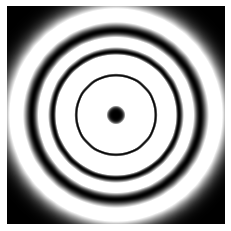

In [43]:
lamb =1064e-9  # m
w0 = 200e-6
k0 = 2 * np.pi / lamb
zR = k0 * w0 ** 2 /2  # [0.12m]
L = 200  # (number of points in xy plane
p = 0
l = 3
A = 1
c = 3 * 10 ** 8  # [m/s]
omega = c * k0  # [1/s]
chi3 = 1e-22  # commom value for chi3 in material
R = 2 / (np.pi * w0 ** 2)  # overlap constant
g = (3 * omega ** 2 * chi3 * R) / 2 * k0 * c
##
##
x = np.linspace(-10 * w0, 10 * w0, L)  # [m]
y = np.linspace(-10 * w0, 10 * w0, L)  # [m]
X, Y = np.meshgrid(x, y)  # [m]
        
r = np.sqrt(X ** 2 + Y ** 2)  # [m]
phi = np.arctan2(Y, X)  # [adimensional]
##
##
zobs = 3 * 12e-2
saturation = 1e57

waist = w0 * np.sqrt(1 + (zobs / zR) ** 2)
r = r / waist

T1 = A * (np.sqrt(2) * r) ** abs(l)
T2 = np.exp(-(1 + 1j * zobs / zR) * r ** 2)
T3 = np.exp(1j * (2 * p + abs(l) + 1)
                    * np.arctan(zobs / zR))
T4 = np.exp(1j * l * phi)
modolg = T1 * T2 * T3 * T4 * lg(p, abs(l), 2 * r ** 2)

waist_renorm = w0 * np.sqrt(1 + (zobs) / zR ** 2)
r_norm = r / waist_renorm
T1n = A * (np.sqrt(2) * r) ** abs(l)
T2n = np.exp(-(1 + 1j * zobs / zR) * r ** 2)
T3n = np.exp(1j * (2 * p + abs(l) + 1) * np.arctan(zobs / zR))
T4n = np.exp(1j * l * phi)
cte = (g * A ** 3) / 3 ** ((3 * abs(l) + 1) / 2)
vortice = modolg

for p in range(1, abs(l) + 1):
    vortice += 1j * zobs * cte * (T1n * T2n * T3n * T4n * lg(p, abs(l), 2 * r ** 2))

plt.imshow(abs(vortice) ** 2, cmap='gray', vmax=saturation)
plt.axis('off');